In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

import warnings
warnings.filterwarnings("ignore")

In [8]:
train = pd.read_csv("open/train.csv")
test = pd.read_csv("open/test.csv")

In [4]:
train.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,TRAIN_000,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9
1,TRAIN_001,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39,23.3
2,TRAIN_002,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
3,TRAIN_003,9.51363,0.0,18.10,0.0,0.713,6.728,94.1,2.4961,24.0,666.0,20.2,6.68,18.71,14.9
4,TRAIN_004,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,21.5


In [5]:
train.tail()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
450,TRAIN_450,0.33983,22.0,5.86,0.0,0.431,6.108,34.9,8.0555,7.0,330.0,19.1,390.18,9.16,24.3
451,TRAIN_451,3.83684,0.0,18.10,0.0,0.770,6.251,91.1,2.2955,24.0,666.0,20.2,350.65,14.19,19.9
452,TRAIN_452,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68,8.1
453,TRAIN_453,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93,20.5
454,TRAIN_454,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64,10.4


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       455 non-null    object 
 1   CRIM     455 non-null    float64
 2   ZN       455 non-null    float64
 3   INDUS    455 non-null    float64
 4   CHAS     455 non-null    float64
 5   NOX      455 non-null    float64
 6   RM       455 non-null    float64
 7   AGE      455 non-null    float64
 8   DIS      455 non-null    float64
 9   RAD      455 non-null    float64
 10  TAX      455 non-null    float64
 11  PTRATIO  455 non-null    float64
 12  B        455 non-null    float64
 13  LSTAT    455 non-null    float64
 14  MEDV     455 non-null    float64
dtypes: float64(14), object(1)
memory usage: 53.4+ KB


In [9]:
test.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,TEST_000,0.11069,0.0,13.89,1.0,0.550,5.951,93.8,2.8893,5.0,276.0,16.4,396.90,17.92
1,TEST_001,6.53876,0.0,18.10,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96
2,TEST_002,5.44114,0.0,18.10,0.0,0.713,6.655,98.2,2.3552,24.0,666.0,20.2,355.29,17.73
3,TEST_003,0.53700,0.0,6.20,0.0,0.504,5.981,68.1,3.6715,8.0,307.0,17.4,378.35,11.65
4,TEST_004,2.92400,0.0,19.58,0.0,0.605,6.101,93.0,2.2834,5.0,403.0,14.7,240.16,9.81


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       51 non-null     object 
 1   CRIM     51 non-null     float64
 2   ZN       51 non-null     float64
 3   INDUS    51 non-null     float64
 4   CHAS     51 non-null     float64
 5   NOX      51 non-null     float64
 6   RM       51 non-null     float64
 7   AGE      51 non-null     float64
 8   DIS      51 non-null     float64
 9   RAD      51 non-null     float64
 10  TAX      51 non-null     float64
 11  PTRATIO  51 non-null     float64
 12  B        51 non-null     float64
 13  LSTAT    51 non-null     float64
dtypes: float64(13), object(1)
memory usage: 5.7+ KB


In [11]:
train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,3.659998,11.165934,11.092747,0.065934,0.555160,6.285352,68.320440,3.788439,9.551648,407.892308,18.453846,356.285714,12.604967,22.574725
std,8.888075,22.953757,6.821697,0.248440,0.116524,0.699346,27.893807,2.082031,8.718624,169.446805,2.149137,92.664335,7.090388,9.120759
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.079230,0.000000,5.160000,0.000000,0.449000,5.881000,44.700000,2.100350,4.000000,278.000000,17.400000,375.990000,6.970000,17.100000
50%,0.245220,0.000000,9.690000,0.000000,0.538000,6.208000,76.700000,3.199200,5.000000,330.000000,19.000000,391.700000,11.280000,21.200000
75%,3.685665,12.500000,18.100000,0.000000,0.624000,6.627000,93.850000,5.164950,24.000000,666.000000,20.200000,396.375000,16.695000,25.100000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


In [13]:
# 학습 데이터 생성
X_train = train.drop(columns=['ID', 'MEDV']) # 집값과 관계 없는 ID와 정답지 제거
Y_train = train['MEDV']

test = test.drop(columns=['ID'])


In [14]:
## Data preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_scaler = scaler.fit_transform(train[train.columns[1:-1]])
test_scaler = scaler.transform(test)

In [15]:
train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,3.659998,11.165934,11.092747,0.065934,0.555160,6.285352,68.320440,3.788439,9.551648,407.892308,18.453846,356.285714,12.604967,22.574725
std,8.888075,22.953757,6.821697,0.248440,0.116524,0.699346,27.893807,2.082031,8.718624,169.446805,2.149137,92.664335,7.090388,9.120759
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.079230,0.000000,5.160000,0.000000,0.449000,5.881000,44.700000,2.100350,4.000000,278.000000,17.400000,375.990000,6.970000,17.100000
50%,0.245220,0.000000,9.690000,0.000000,0.538000,6.208000,76.700000,3.199200,5.000000,330.000000,19.000000,391.700000,11.280000,21.200000
75%,3.685665,12.500000,18.100000,0.000000,0.624000,6.627000,93.850000,5.164950,24.000000,666.000000,20.200000,396.375000,16.695000,25.100000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


In [18]:
model = Ridge(alpha=1.0)

In [19]:
model.fit(train_scaler, train['MEDV'])

Ridge()

In [20]:
pred = model.predict(test_scaler)

In [21]:
model.score(train_scaler, train['MEDV'])
# train 결과는 0.74

0.7421335337580963

In [26]:
features =  ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

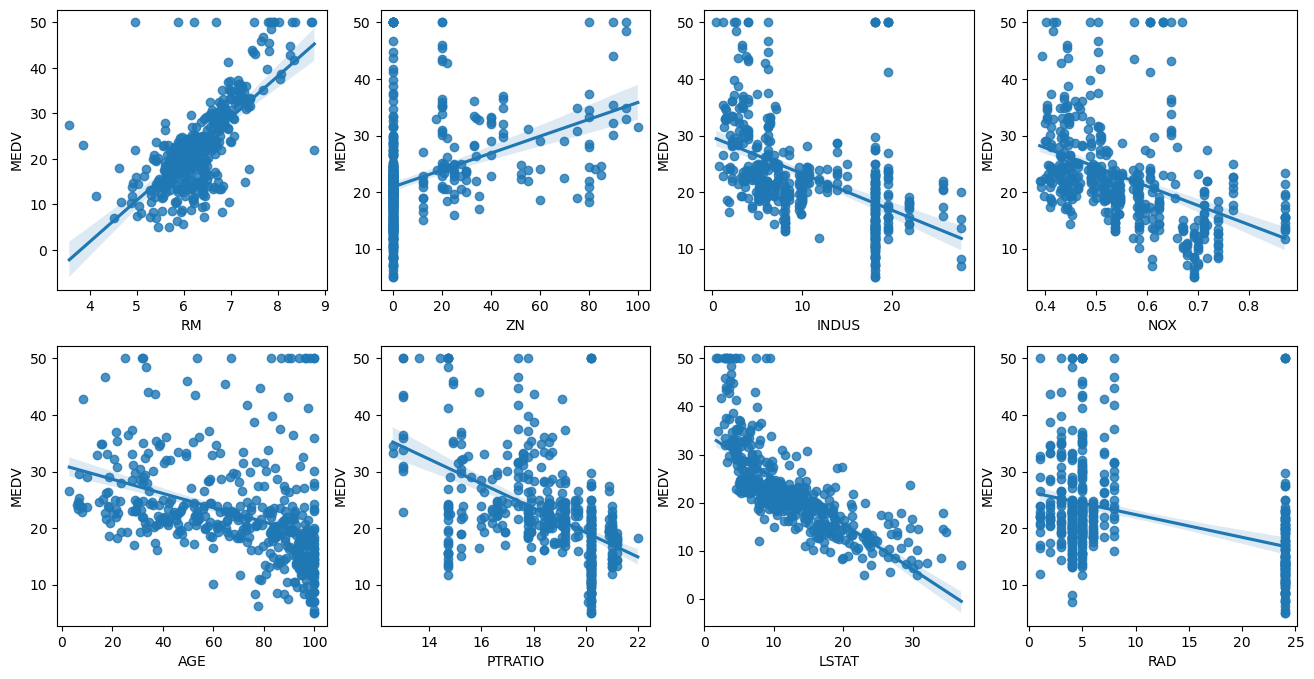

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, feature in enumerate(features):
    row = int(i / 4)
    col = i % 4
    
    sns.regplot(x=feature, y='MEDV', data=train, ax=axes[row][col])

In [25]:
train['MEDV']

0      21.9
1      23.3
2      32.9
3      14.9
4      21.5
       ... 
450    24.3
451    19.9
452     8.1
453    20.5
454    10.4
Name: MEDV, Length: 455, dtype: float64

In [28]:
train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.196246,0.404043,-0.053530,0.410551,-0.212673,0.349981,-0.375011,0.614488,0.570890,0.287082,-0.384054,0.444276,-0.386511
ZN,-0.196246,1.000000,-0.525693,-0.025098,-0.505469,0.317844,-0.556758,0.647406,-0.306968,-0.316827,-0.388047,0.181655,-0.416454,0.376084
INDUS,0.404043,-0.525693,1.000000,0.057221,0.759181,-0.391466,0.638347,-0.702260,0.603900,0.730394,0.373639,-0.369784,0.608342,-0.483034
CHAS,-0.053530,-0.025098,0.057221,1.000000,0.081192,0.121848,0.069445,-0.089970,-0.006660,-0.033841,-0.118460,0.043095,-0.064032,0.181734
NOX,0.410551,-0.505469,0.759181,0.081192,1.000000,-0.306085,0.730537,-0.762721,0.609330,0.666784,0.175569,-0.385323,0.597259,-0.433293
RM,-0.212673,0.317844,-0.391466,0.121848,-0.306085,1.000000,-0.245285,0.210719,-0.214426,-0.299118,-0.354118,0.131836,-0.611582,0.697426
AGE,0.349981,-0.556758,0.638347,0.069445,0.730537,-0.245285,1.000000,-0.741336,0.462316,0.517079,0.250436,-0.281139,0.603303,-0.384123
DIS,-0.375011,0.647406,-0.702260,-0.089970,-0.762721,0.210719,-0.741336,1.000000,-0.496010,-0.539764,-0.227028,0.302359,-0.498786,0.260402
RAD,0.614488,-0.306968,0.603900,-0.006660,0.609330,-0.214426,0.462316,-0.496010,1.000000,0.908535,0.467822,-0.454256,0.486773,-0.383792
TAX,0.570890,-0.316827,0.730394,-0.033841,0.666784,-0.299118,0.517079,-0.539764,0.908535,1.000000,0.461456,-0.450327,0.547234,-0.470998


In [29]:
corr_order = train.corr().loc[:'LSTAT', 'MEDV'].abs().sort_values(ascending=False)
corr_order

LSTAT      0.738124
RM         0.697426
PTRATIO    0.508638
INDUS      0.483034
TAX        0.470998
NOX        0.433293
CRIM       0.386511
AGE        0.384123
RAD        0.383792
ZN         0.376084
B          0.332199
DIS        0.260402
CHAS       0.181734
Name: MEDV, dtype: float64

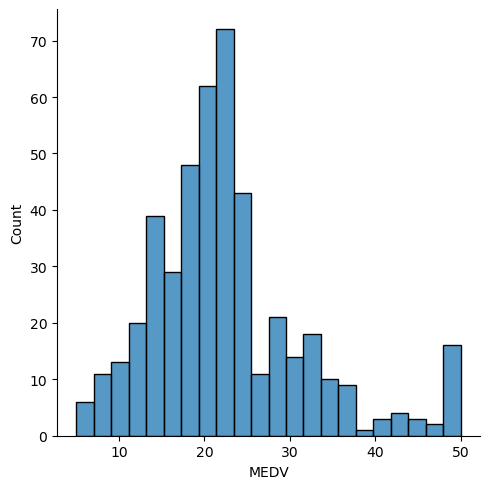

In [30]:
# 집값 데이터 분포
sns.displot(x='MEDV', data=train, kind='hist')

In [31]:
# 일부 데이터만 사용하여 예측모델 생성
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57
1,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39
2,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45
3,9.51363,0.0,18.10,0.0,0.713,6.728,94.1,2.4961,24.0,666.0,20.2,6.68,18.71
4,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.33983,22.0,5.86,0.0,0.431,6.108,34.9,8.0555,7.0,330.0,19.1,390.18,9.16
451,3.83684,0.0,18.10,0.0,0.770,6.251,91.1,2.2955,24.0,666.0,20.2,350.65,14.19
452,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68
453,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93


In [33]:
X_train.iloc[:, :] = train_scaler[:, :]

In [34]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.406813,3.002116,-1.093709,-0.265684,-1.401764,-0.253876,-1.303530,2.611796,-0.981928,-0.548813,-0.956713,0.395455,-0.852084
1,-0.251735,-0.486989,1.245525,-0.265684,2.713496,0.321580,1.136970,-0.972495,-0.522635,-0.028904,-1.748599,0.086691,-0.736308
2,-0.410238,3.656323,-1.412162,-0.265684,-1.307259,1.216256,-1.953134,1.858385,-0.752282,-0.034812,-0.677224,0.302653,-1.151410
3,0.659319,-0.486989,1.028331,-0.265684,1.356062,0.633643,0.925221,-0.621394,1.659007,1.524914,0.813385,-3.776971,0.861977
4,-0.225651,-0.486989,1.245525,-0.265684,2.713496,-0.233835,1.040068,-1.043610,-0.522635,-0.028904,-1.748599,0.178412,0.211086


In [35]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [36]:
lr_model.fit(X_train, Y_train)

LinearRegression()

In [37]:
lr_pred = lr_model.predict(test_scaler)

In [38]:
from sklearn.metrics import mean_squared_error

train_pred = lr_model.predict(X_train)

train_mse = mean_squared_error(Y_train, train_pred)
train_mse

21.40309820355106

In [39]:
train_ridge_pred = model.predict(X_train)
train_ridge_mse = mean_squared_error(Y_train, train_ridge_pred)
train_ridge_mse

21.40431050353978

In [40]:
X_train_cut = X_train.loc[:, ['LSTAT', 'RM']]

In [41]:
lr_cut_model = LinearRegression()
lr_cut_model.fit(X_train_cut, Y_train)

LinearRegression()

In [43]:
train_cut_pred = lr_cut_model.predict(X_train_cut)

In [44]:
train_cut_mse = mean_squared_error(Y_train, train_cut_pred)

In [45]:
train_cut_mse

29.757030935638493

In [46]:
X_train_cut = X_train.loc[:, ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX']]

In [47]:
lr_cut_model = LinearRegression()
lr_cut_model.fit(X_train_cut, Y_train)

train_cut_pred = lr_cut_model.predict(X_train_cut)
train_cut_mse = mean_squared_error(Y_train, train_cut_pred)
train_cut_mse

25.99817499391716

In [48]:
# RandomForest Regressor 사용하기
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

In [49]:
rf_model.fit(X_train, Y_train)

RandomForestRegressor()

In [50]:
rf_pred = rf_model.predict(X_train)
rf_pred_mse = mean_squared_error(Y_train, rf_pred)

In [51]:
rf_pred_mse

1.3165973846153844

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

gb_model.fit(X_train, Y_train)
gb_pred = gb_model.predict(X_train)
gb_pred_mse = mean_squared_error(Y_train, gb_pred)

gb_pred_mse

1.9612594110657675

In [58]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

lr_model.fit(X_train, Y_train)
lr_pred = lr_model.predict(X_train)
lr_pred_mse = mean_squared_error(Y_train, lr_pred)

lr_pred_mse

21.40309820355106

In [57]:
from sklearn.linear_model import Ridge
r_model = Ridge(alpha=1.0)

r_model.fit(X_train, Y_train)
r_pred = r_model.predict(X_train)
r_pred_mse = mean_squared_error(Y_train, r_pred)

r_pred_mse

21.40431050353978

<AxesSubplot:>

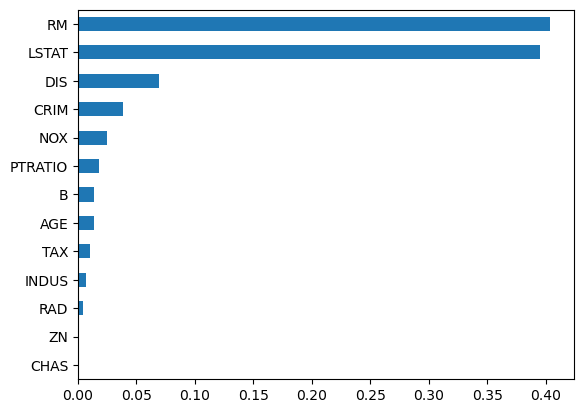

In [61]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns.values)
feature_importance.sort_values(ascending=True).plot(kind="barh")

In [62]:
X_train_cut = X_train.drop(columns=['ZN', 'CHAS'])

In [63]:
rf_model_cut = RandomForestRegressor()

rf_model_cut.fit(X_train_cut, Y_train)
rf_pred_cut = rf_model_cut.predict(X_train_cut)
rf_pred_cut_mse = mean_squared_error(Y_train, rf_pred_cut)

rf_pred_cut_mse
# 꼭 필요없는 변수 drop을 한다고 모델의 성능이 더 뛰어나지는것은 아닌듯..왜그럴까..

1.4619617054945042

In [66]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [100, 200, 500, 1000],
    "criterion": ["absolute_error", "squared_error"],
    "max_depth": [i for i in range(1, 10, 2)]
}

params

{'n_estimators': [100, 200, 500, 1000],
 'criterion': ['absolute_error', 'squared_error'],
 'max_depth': [1, 3, 5, 7, 9]}

In [67]:
# Grid search를 통해 Random forest model의 최적의 parameter 찾음 -> 찾은 parameter를 통한 학습
grid = GridSearchCV(estimator=rf_model, param_grid=params, cv=3)
grid = grid.fit(X_train, Y_train)
print(f"Best score of parameter search is : {grid.best_score_:4f}")

print("Score :")
for key, value in grid.best_params_.items():
    print(f"\t {key}:{value}")

Best score of parameter search is : 0.866898
Score :
	 criterion:squared_error
	 max_depth:9
	 n_estimators:100


In [68]:
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_train)
rf_pred_mse = mean_squared_error(Y_train, rf_pred)

rf_pred_mse

1.4018084967032973

In [70]:
rf_model_cv = RandomForestRegressor(n_estimators=100, max_depth=9, criterion='squared_error')
rf_model_cv.fit(X_train, Y_train)
rf_pred_cv = rf_model_cv.predict(X_train)
rf_pred_cv_mse = mean_squared_error(Y_train, rf_pred_cv)

rf_pred_cv_mse

1.8902294364321868

In [71]:
# 챗지피티의 제안


# 예시 하이퍼파라미터 그리드
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# RandomForest 모델
rf_model = RandomForestRegressor()

# GridSearchCV
grid = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3)
grid = grid.fit(X_train, Y_train)

# 최적의 하이퍼파라미터와 점수 출력
print(f"Best score of parameter search is: {grid.best_score_:4f}")
print(f"Best parameters: {grid.best_params_}")

# 최적의 하이퍼파라미터로 모델 재훈련
best_model = grid.best_estimator_
best_model.fit(X_train, Y_train)

best_predict = best_model.predict(X_train)
best_predict_mse = mean_squared_error(Y_train, best_predict)



Best score of parameter search is: 0.870494
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [72]:
best_predict_mse

1.5436101958922506

In [73]:
rf_model = RandomForestRegressor()

rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_train)
rf_pred_mse = mean_squared_error(Y_train, rf_pred)
rf_pred_mse

1.3937004307692304

In [74]:
pred = rf_model.predict(test_scaler)

submit = pd.read_csv('open/sample_submission.csv')
submit['MEDV'] = pred
submit.head()

,ID,MEDV
0,TEST_000,20.053
1,TEST_001,38.186
2,TEST_002,15.957
3,TEST_003,21.438
4,TEST_004,22.448


In [75]:
submit.to_csv("submit.csv", index=False)